# Logistic Regression
## Theoretical fundations

Useful link: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [84]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Odds, Logit and Sigmoid

### 1.1 From Probabilities to Odds

* Need of a new, unlimited working space

* Odds:
$$Odd(x) = \frac{\text{Favorable } x}{\text{Not favorable } x} = \frac{P(x)}{1 - P(x)}$$

Text(0, 0.5, '$\\dfrac{P}{1-P}$')

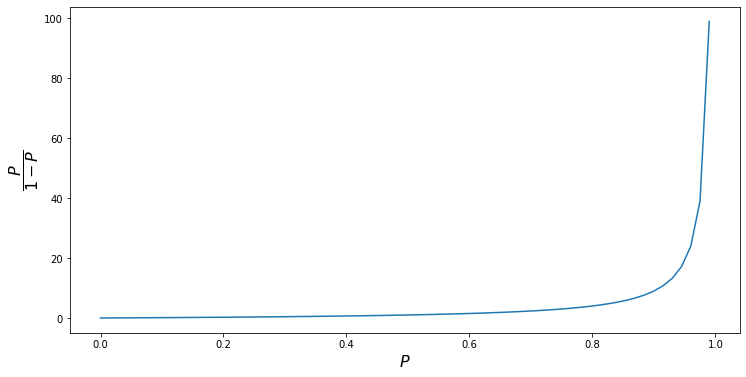

In [85]:
odd = lambda p: p/(1-p)

probs_test = np.arange(0,1,0.015)

fig, ax = plt.subplots(1, figsize=(12,6))

ax.plot(probs_test, odd(probs_test))
ax.set_xlabel('$P$', fontsize=16)
ax.set_ylabel('$\dfrac{P}{1-P}$', rotation=90, fontsize=16)

/home/luis/Documentos/Programación/python/Topicos_II/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '$logit(P)$')

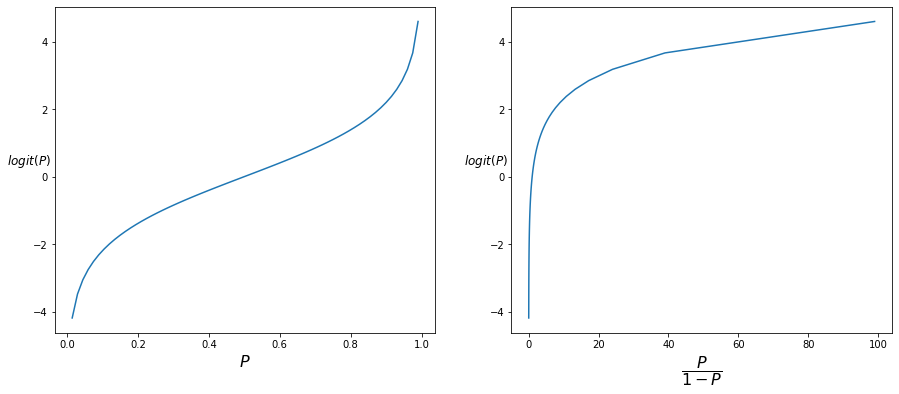

In [86]:
logit=lambda o: np.log(odd(o))

fig, ax = plt.subplots(1, 2, figsize=(15,6))

ax[0].plot(probs_test, logit(probs_test))
ax[0].set_xlabel('$P$', fontsize=16)
ax[0].set_ylabel('$logit(P)$', rotation=0, fontsize=12)
   
ax[1].plot(odd(probs_test), logit(probs_test))
ax[1].set_xlabel('$\dfrac{P}{1-P}$', fontsize=16)
ax[1].set_ylabel('$logit(P)$', rotation=0, fontsize=12)

### 1.2 What's the intention under all of this?

* Known result
$$\hat{y} = \theta^Tx \in {\rm I\!R}$$

* The hero we needed:
$$\sigma: {\rm I\!R} \rightarrow [0,1]$$

* Sigmoid function
$$\sigma(x) = logit^{-1}(x) = \frac{1}{1 + exp(-x)}$$

/home/luis/Documentos/Programación/python/Topicos_II/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Sigmoid')

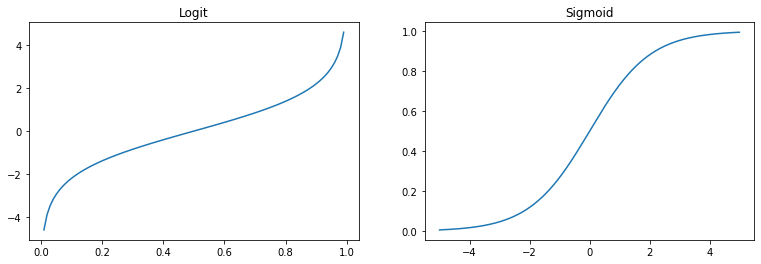

In [87]:
x = np.arange(-5,5,0.01)
y = np.arange(0,1,0.01)

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(y, logit(y))
ax[0].set_title('Logit')
ax[1].plot(x, sigmoid(x))
ax[1].set_title('Sigmoid')

___
$$\hat{p} = h_{\theta}(x) = \sigma(\theta^Tx)$$
___

## 2. Cost function: The pain won't stop

### 2.1 Simple approach

$$\hat{y}=\begin{cases}
               0, \hat{p} < 0.5\\
               1, \hat{p} >= 0.5
            \end{cases}$$

* Penalty need (0 vs 1)

![](https://miro.medium.com/max/1621/1*_NeTem-yeZ8Pr9cVUoi_HA.png)

* Need of derivation

* Loss function

$$J(\theta)=\begin{cases}
               -log(\hat{p}), y = 1 \\
               -log(1-\hat{p}), y = 0
            \end{cases}$$
            
Finally:
___
$$J(\theta) = -\frac{1}{m} \displaystyle \sum_{i=1}^{m} [y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1-\hat{p}^{(i)}) ]$$
___

### 2.2 Loss derivative: God abandonned us long ago

* Securing the unique minimum loss (convex)

* Finding the optim value

* Sigmoid property

$\begin{align}\frac{d}{dx}\sigma(x)&=\frac{d}{dx}\left(\frac{1}{1+e^{-x}}\right)\\[2ex]
&=\frac{-(1+e^{-x})'}{(1+e^{-x})^2}\\[2ex]
&=\frac{e^{-x}}{(1+e^{-x})^2}\\[2ex]
&=\left(\frac{1}{1+e^{-x}}\right)\left(\frac{e^{-x}}{1+e^{-x}}\right)\\[2ex]
&=\left(\frac{1}{1+e^{-x}}\right)\,\left(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}}\right)\\[2ex]
&=\sigma(x)\,\left(\frac{1+e^{-x}}{1+e^{-x}}-\sigma(x)\right)\\[2ex]
&=\sigma(x)\,(1-\sigma(x))
\end{align}$

___
$\displaystyle \frac{\partial J(\theta)}{\partial \theta_j}  = 
\frac{\partial}{\partial \theta_j} \,\frac{-1}{m}\sum_{i=1}^m 
\left[ y^{(i)}\log\left(h_\theta \left(x^{(i)}\right)\right) +
(1 -y^{(i)})\log\left(1-h_\theta \left(x^{(i)}\right)\right)\right]
\\[2ex]\displaystyle\underset{\text{linearity}}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\partial}{\partial \theta_j}\log\left(h_\theta \left(x^{(i)}\right)\right) +
(1 -y^{(i)})\frac{\partial}{\partial \theta_j}\log\left(1-h_\theta \left(x^{(i)}\right)\right)
\right]
\\[2ex]\displaystyle \underset{\text{chain rule}}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\frac{\partial}{\partial \theta_j}h_\theta \left(x^{(i)}\right)}{h_\theta\left(x^{(i)}\right)} +
(1 -y^{(i)})\frac{\frac{\partial}{\partial \theta_j}\left(1-h_\theta \left(x^{(i)}\right)\right)}{1-h_\theta\left(x^{(i)}\right)}
\right]
\\[2ex]\displaystyle \underset{h_\theta(x)=\sigma\left(\theta^\top x\right)}=\,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{\frac{\partial}{\partial \theta_j}\sigma\left(\theta^\top x^{(i)}\right)}{h_\theta\left(x^{(i)}\right)} +
(1 -y^{(i)})\frac{\frac{\partial}{\partial \theta_j}\left(1-\sigma\left(\theta^\top x^{(i)}\right)\right)}{1-h_\theta\left(x^{(i)}\right)}
\right]
\\[2ex]\displaystyle \underset{\sigma'}=\frac{-1}{m}\,\sum_{i=1}^m 
\left[ y^{(i)}\,
\frac{\sigma\left(\theta^\top x^{(i)}\right)\left(1-\sigma\left(\theta^\top x^{(i)}\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x^{(i)}\right)}{h_\theta\left(x^{(i)}\right)} -
(1 -y^{(i)})\,\frac{\sigma\left(\theta^\top x^{(i)}\right)\left(1-\sigma\left(\theta^\top x^{(i)}\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x^{(i)}\right)}{1-h_\theta\left(x^{(i)}\right)}
\right]
\\[2ex]\displaystyle \underset{\sigma\left(\theta^\top x\right)=h_\theta(x)}= \,\frac{-1}{m}\,\sum_{i=1}^m 
\left[ 
y^{(i)}\frac{h_\theta\left( x^{(i)}\right)\left(1-h_\theta\left( x^{(i)}\right)\right)\frac{\partial}{\partial \theta_j}\left(\theta^\top x^{(i)}\right)}{h_\theta\left(x^{(i)}\right)} -
(1 -y^{(i)})\frac{h_\theta\left( x^{(i)}\right)\left(1-h_\theta\left(x^{(i)}\right)\right)\frac{\partial}{\partial \theta_j}\left( \theta^\top x^{(i)}\right)}{1-h_\theta\left(x^{(i)}\right)}
\right]
\\[2ex]\displaystyle \underset{\frac{\partial}{\partial \theta_j}\left(\theta^\top x^{(i)}\right)=x_j^{(i)}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{(i)}\left(1-h_\theta\left(x^{(i)}\right)\right)x_j^{(i)}-
\left(1-y^{i}\right)\,h_\theta\left(x^{(i)}\right)x_j^{(i)}
\right]
\\[2ex]\displaystyle \underset{\text{distribute}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{i}-y^{i}h_\theta\left(x^{(i)}\right)-
h_\theta\left(x^{(i)}\right)+y^{(i)}h_\theta\left(x^{(i)}\right)
\right]\,x_j^{(i)}
\\[2ex]\displaystyle \underset{\text{cancel}}=\,\frac{-1}{m}\,\sum_{i=1}^m \left[y^{(i)}-h_\theta\left(x^{(i)}\right)\right]\,x_j^{(i)} \\[2ex]\displaystyle =\frac{1}{m}\sum_{i=1}^m\left[h_\theta\left(x^{(i)}\right)-y^{(i)}\right]\,x_j^{(i)}$
___

## 3. Python tools: Returning to civilization

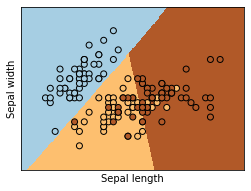

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()